# Fitting a Regression Line and Finding the mpg of a given attributes


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("mtcars.csv")
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,5.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [2]:
summary=df.describe()
summary=summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,24.890625,32.565947,5.000,15.20000,18.950,22.80,200.000
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [3]:
len(df.columns)

11

In [4]:
df['vs'] = df['vs'].astype('category')
df['am'] = df['am'].astype('category')

In [5]:
a=df['vs']
b=df['am']
print(a,"\n",b)

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    1
21    0
22    0
23    0
24    0
25    1
26    0
27    1
28    0
29    0
30    0
31    1
Name: vs, dtype: category
Categories (2, int64): [0, 1] 
 0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: am, dtype: category
Categories (2, int64): [0, 1]


In [6]:
structure_of_df=str(df)
print("Structure of Date Frame\n", structure_of_df)

Structure of Date Frame
       mpg  cyl   disp   hp  drat     wt   qsec vs am  gear  carb
0     5.0    6  160.0  110  3.90  2.620  16.46  0  1     4     4
1    21.0    6  160.0  110  3.90  2.875  17.02  0  1     4     4
2    22.8    4  108.0   93  3.85  2.320  18.61  1  1     4     1
3    21.4    6  258.0  110  3.08  3.215  19.44  1  0     3     1
4    18.7    8  360.0  175  3.15  3.440  17.02  0  0     3     2
5    18.1    6  225.0  105  2.76  3.460  20.22  1  0     3     1
6    14.3    8  360.0  245  3.21  3.570  15.84  0  0     3     4
7    24.4    4  146.7   62  3.69  3.190  20.00  1  0     4     2
8    22.8    4  140.8   95  3.92  3.150  22.90  1  0     4     2
9    19.2    6  167.6  123  3.92  3.440  18.30  1  0     4     4
10   17.8    6  167.6  123  3.92  3.440  18.90  1  0     4     4
11   16.4    8  275.8  180  3.07  4.070  17.40  0  0     3     3
12   17.3    8  275.8  180  3.07  3.730  17.60  0  0     3     3
13   15.2    8  275.8  180  3.07  3.780  18.00  0  0     3     3


In [7]:
df.select_dtypes(include=['category'])

,vs,am
0,0,1
1,0,1
2,1,1
3,1,0
4,0,0
5,1,0
6,0,0
7,1,0
8,1,0
9,1,0


In [8]:
df.head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,5.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [9]:
summary

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,24.890625,32.565947,5.000,15.20000,18.950,22.80,200.000
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [20]:
std_mpg=df['mpg'].std()
std_hp=df['hp'].std()
print("Standard deviation of MPG is",std_mpg)
print("Standard deviation of hp is",std_hp)

Standard deviation of MPG is 32.56594658559964
Standard deviation of hp is 68.56286848932059


In [11]:
df['mpg'].isnull()
#False-->No missing Values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: mpg, dtype: bool

In [12]:
df.isnull().any()
#checking missing values in all the variables of data.False-->no missing values

mpg     False
cyl     False
disp    False
hp      False
drat    False
wt      False
qsec    False
vs      False
am      False
gear    False
carb    False
dtype: bool

In [13]:
summary

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,24.890625,32.565947,5.000,15.20000,18.950,22.80,200.000
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [14]:
df.info()
#structure of mtcars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null category
am      32 non-null category
gear    32 non-null int64
carb    32 non-null int64
dtypes: category(2), float64(5), int64(4)
memory usage: 2.6 KB


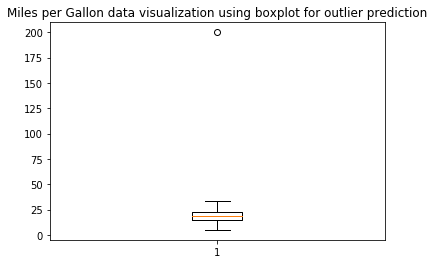

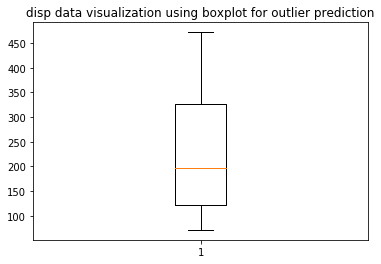

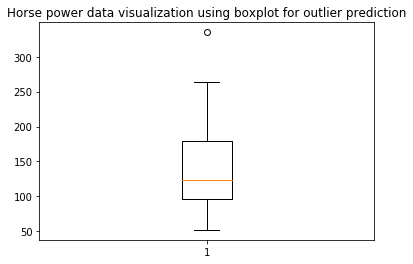

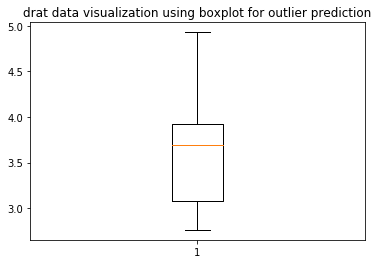

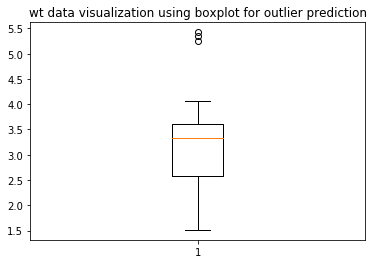

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,5.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [15]:
                                       #checking outlier for mpg data
plt.boxplot(df['mpg'])
plt.title("Miles per Gallon data visualization using boxplot for outlier prediction")
plt.show()#-->There is an Outlier


plt.boxplot(df['disp'])
plt.title("disp data visualization using boxplot for outlier prediction")
plt.show()#-->There are no Outlier


plt.boxplot(df['hp'])
plt.title("Horse power data visualization using boxplot for outlier prediction")
plt.show()#-->There is an outlier


plt.boxplot(df['drat'])
plt.title("drat data visualization using boxplot for outlier prediction")
plt.show()#-->There are no outliers


plt.boxplot(df['wt'])
plt.title("wt data visualization using boxplot for outlier prediction")
plt.show()#-->Here there are  outliers

df#-->There are an outliers


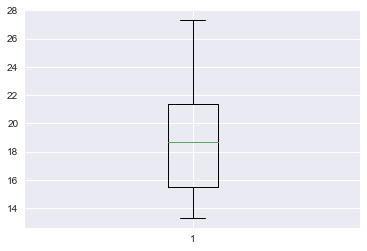

In [50]:
P = np.percentile(df.mpg, [5, 90])
mpg_data = df[(df.mpg > P[0]) & (df.mpg < P[1])]
mpg_data=mpg_data['mpg']
plt.boxplot(mpg_data)
plt.show()
#-->Outlier

In [51]:
limittt = df.wt.quantile(.90)
valid_dataaa= df[df['wt'] < limittt]
wt_data=valid_dataaa['wt']

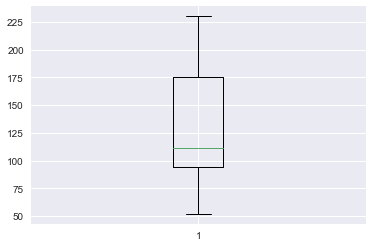

In [52]:
#Removing the outliers by reducing the values greater thann 95%quantile to 95%
limit = df.hp.quantile(.90)
valid_data= df[df['hp'] < limit]
hp_data=valid_data['hp']
plt.boxplot(hp_data)
plt.show()
#-->Outliers Removed

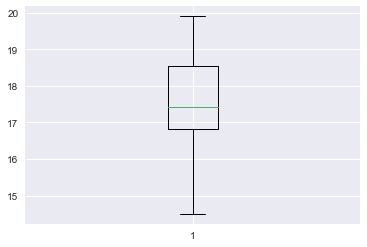

In [53]:
limitt = df.qsec.quantile(.90)
valid_dataa= df[df['qsec'] < limitt]
qsec_data=valid_dataa['qsec']
plt.boxplot(qsec_data)
plt.show()
#-->Outliers Removed

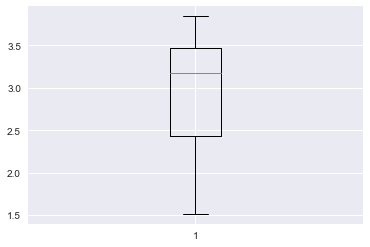

In [54]:
limittt = df.wt.quantile(.90)
valid_dataaa= df[df['wt'] < limittt]
wt_data=valid_dataaa['wt']
plt.boxplot(wt_data)
plt.show()
#-->Outliers Removed

In [55]:
after_removing_outliers=pd.DataFrame({'mpg':mpg_data, 'cyl':df['cyl'], 'disp':df['disp'], 'hp':hp_data, 'drat':df['drat'], 'wt':wt_data, 'qsec':qsec_data, 'vs':df['vs'], 'am':df['am'], 'gear':df['gear'], 'carb':df['carb']
})
after_removing_outliers

,am,carb,cyl,disp,drat,gear,hp,mpg,qsec,vs,wt
0,1,4,6,160.0,3.90,4,110.0,NaN,16.46,0,2.620
1,1,4,6,160.0,3.90,4,110.0,21.0,17.02,0,2.875
2,1,1,4,108.0,3.85,4,93.0,22.8,18.61,1,2.320
3,0,1,6,258.0,3.08,3,110.0,21.4,19.44,1,3.215
4,0,2,8,360.0,3.15,3,175.0,18.7,17.02,0,3.440
5,0,1,6,225.0,2.76,3,105.0,18.1,NaN,1,3.460
6,0,4,8,360.0,3.21,3,NaN,14.3,15.84,0,3.570
7,0,2,4,146.7,3.69,4,62.0,24.4,NaN,1,3.190
8,0,2,4,140.8,3.92,4,95.0,22.8,NaN,1,3.150
9,0,4,6,167.6,3.92,4,123.0,19.2,18.30,1,3.440


In [56]:
after_removing_outliers.dropna()
after_removing_outliers.isnull().sum()
fresh_table=after_removing_outliers.dropna()

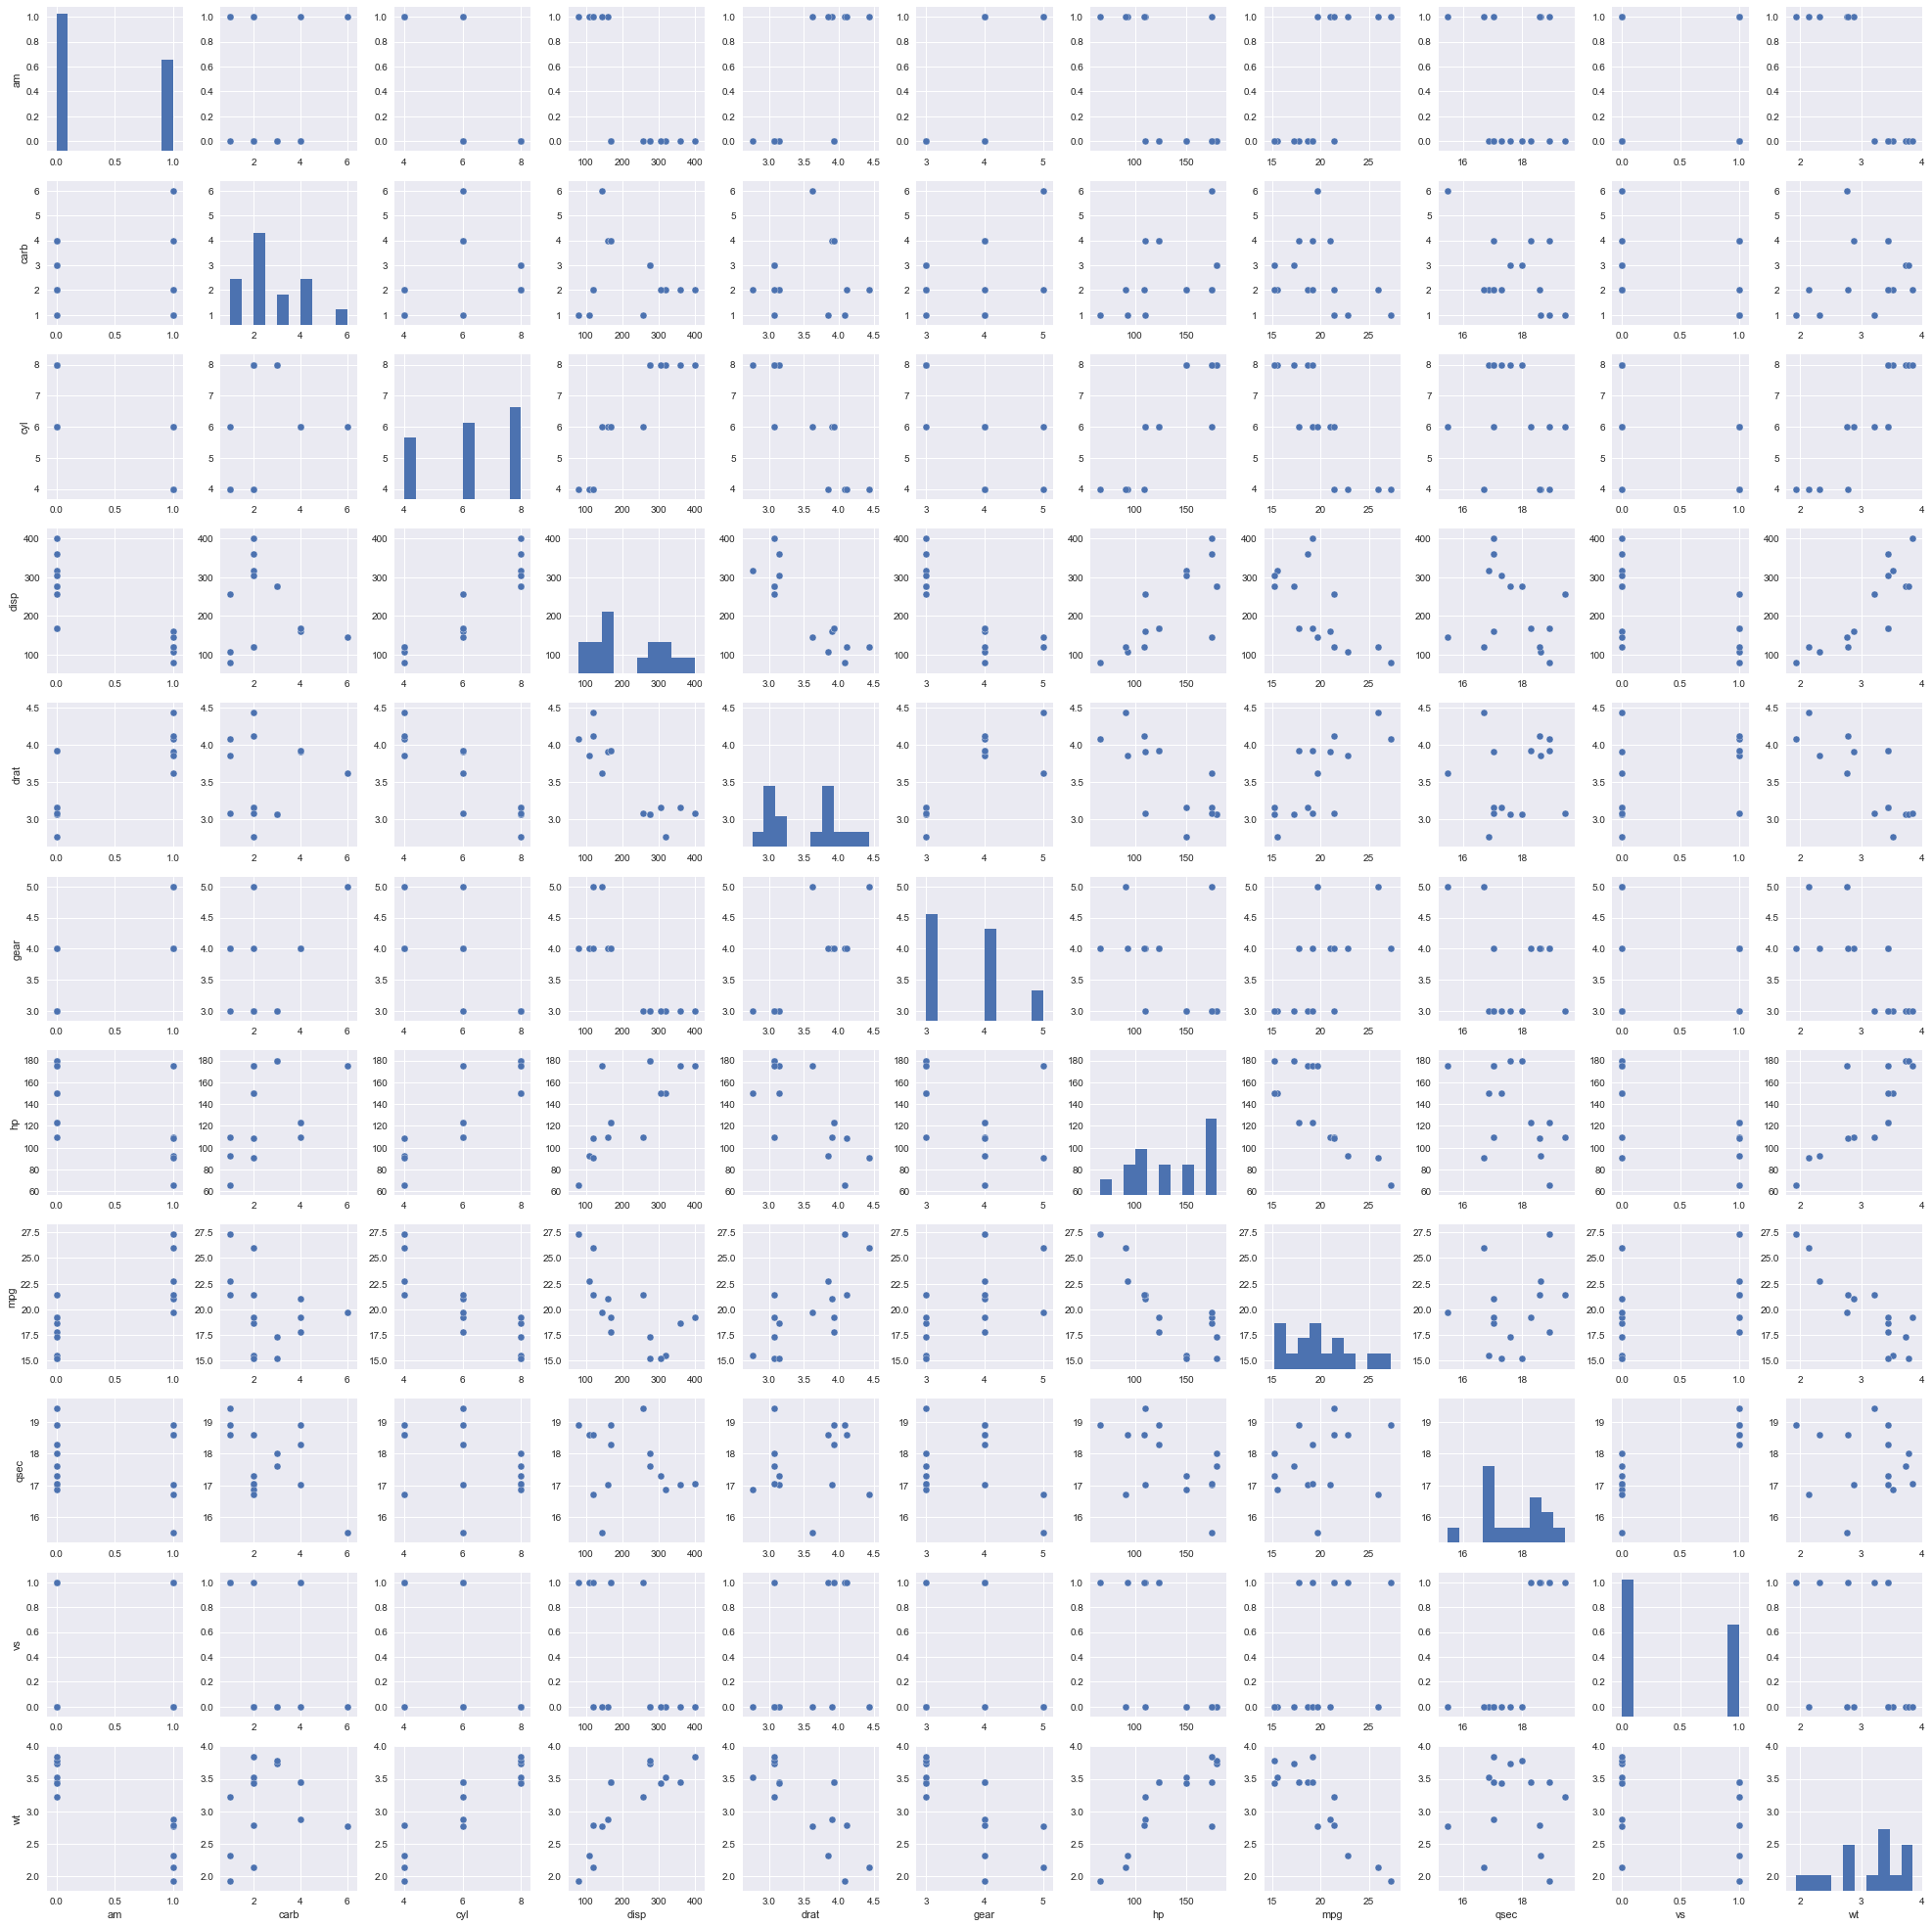

In [57]:
import seaborn as sns
sns.pairplot(fresh_table, kind="scatter")
plt.show()

In [58]:
#sub set data for featurs for finding continuous variables
features=pd.DataFrame({'mpg':fresh_table['mpg'], 'disp':fresh_table['disp'], 'hp':fresh_table['hp'], 'drat':fresh_table['drat'], 'wt':fresh_table['wt'], 'qsec':fresh_table['qsec']})

In [59]:
features

,disp,drat,hp,mpg,qsec,wt
1,160.0,3.90,110.0,21.0,17.02,2.875
2,108.0,3.85,93.0,22.8,18.61,2.320
3,258.0,3.08,110.0,21.4,19.44,3.215
4,360.0,3.15,175.0,18.7,17.02,3.440
9,167.6,3.92,123.0,19.2,18.30,3.440
10,167.6,3.92,123.0,17.8,18.90,3.440
12,275.8,3.07,180.0,17.3,17.60,3.730
13,275.8,3.07,180.0,15.2,18.00,3.780
21,318.0,2.76,150.0,15.5,16.87,3.520
22,304.0,3.15,150.0,15.2,17.30,3.435


In [60]:
features.corr()

,disp,drat,hp,mpg,qsec,wt
disp,1.000000,-0.878387,0.761775,-0.683839,-0.262780,0.822861
drat,-0.878387,1.000000,-0.740594,0.740447,0.167020,-0.764542
hp,0.761775,-0.740594,1.000000,-0.795364,-0.528258,0.802932
mpg,-0.683839,0.740447,-0.795364,1.000000,0.217709,-0.885435
qsec,-0.262780,0.167020,-0.528258,0.217709,1.000000,-0.088086
wt,0.822861,-0.764542,0.802932,-0.885435,-0.088086,1.000000


Black squares gives Positive correlation,grey gives Negetive correlation.The light the squares the lesser the correlation


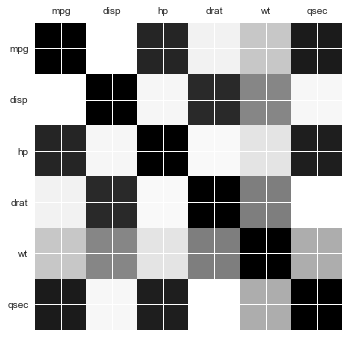

In [26]:
plt.matshow(features.corr())

print("Black squares gives Positive correlation,grey gives Negetive correlation.The light the squares the lesser the correlation")
plt.xticks(np.arange(6), ('mpg', 'disp', 'hp', 'drat', 'wt','qsec'))
plt.yticks(np.arange(6), ('mpg', 'disp', 'hp', 'drat', 'wt','qsec'))
plt.show()

Text(0.5,1,'To check the relation between mpg and am')

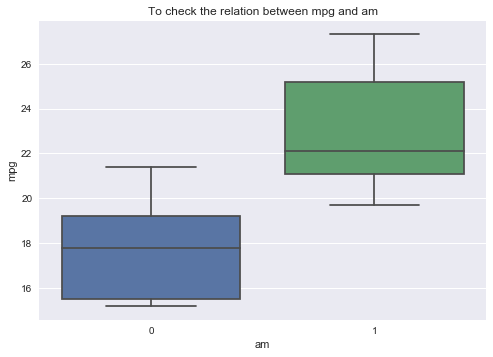

In [27]:
sns.boxplot(y=fresh_table['mpg'], x=fresh_table['am'], data=fresh_table)
plt.title("To check the relation between mpg and am")

Text(0.5,1,'To check the relation between mpg and am')

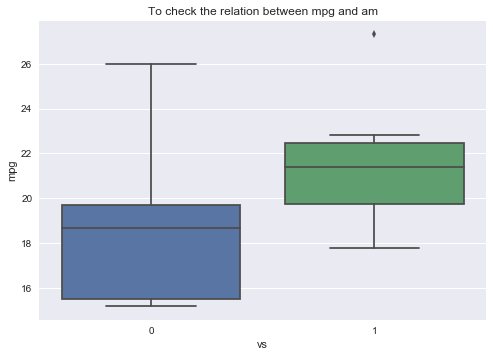

In [28]:
sns.boxplot(y=fresh_table['mpg'], x=fresh_table['vs'], data=fresh_table)
plt.title("To check the relation between mpg and am")

In [29]:
fresh_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 31
Data columns (total 11 columns):
am      15 non-null category
carb    15 non-null int64
cyl     15 non-null int64
disp    15 non-null float64
drat    15 non-null float64
gear    15 non-null int64
hp      15 non-null float64
mpg     15 non-null float64
qsec    15 non-null float64
vs      15 non-null category
wt      15 non-null float64
dtypes: category(2), float64(6), int64(3)
memory usage: 2.0 KB


In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
resulttt = ols(formula="mpg~vs", data=fresh_table).fit()
aov_1=sm.stats.anova_lm(resulttt, typ=2)
aov_1

,sum_sq,df,F,PR(>F)
vs,32.520111,1.0,2.80537,0.117822
Residual,150.697222,13.0,NaN,NaN


In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
resulttt = ols(formula="mpg~am", data=fresh_table).fit()
aov_2=sm.stats.anova_lm(resulttt, typ=2)
aov_2

,sum_sq,df,F,PR(>F)
am,101.548444,1.0,16.164415,0.001455
Residual,81.668889,13.0,NaN,NaN


In [64]:
import statsmodels.formula.api as sm
resulttt = sm.ols(formula="mpg~(cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb)", data=fresh_table).fit()
resulttt.summary()

C:\Users\manis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     4.616
Date:                Fri, 29 Jun 2018   Prob (F-statistic):             0.0768
Time:                        17:13:17   Log-Likelihood:                -21.087
No. Observations:                  15   AIC:                             64.17
Df Residuals:                       4   BIC:                             71.96
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.9094    110.273      0.625      0.566    -237.257     375.076
cyl           -5.3537      5.303     -1.010      0.370     -20.077       9.370
disp           0.0521      0.027      1.966      0.121      -0.021       0.126
hp             0.0084      0.044      0.191      0.858      -0.113       0.130
drat           1.9885      3.272      0.608      0.576      -7.096      11.073
wt           -10.3059      5.350     -1.926      0.126     -25.161       4.549
qsec           0.8782      2.803      0.313      0.770      -6.905       8.662
vs            -4.2327      4.382     -0.966      0.389     -16.398       7.932
am            -5.4818      7.795     -0.703      0.521     -27.125      16.161
gear          -6.0624      9.212     -0.658      0.546     -31.640      19.515
carb           2.9231      2.524      1.158      0.311      -4.084       9.931
==============================================================================
Omnibus:                        0.697   Durbin-Watson:                   2.433
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.702
Skew:                           0.350   Prob(JB):                        0.704
Kurtosis:                       2.204   Cond. No.                     6.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
import statsmodels.formula.api as sm
from statsmodels.tools import add_constant
resulttt = sm.ols(formula="mpg~(wt+qsec+am)", data=fresh_table).fit()
resulttt.summary()

C:\Users\manis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     15.10
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           0.000325
Time:                        16:41:16   Log-Likelihood:                -27.809
No. Observations:                  15   AIC:                             63.62
Df Residuals:                      11   BIC:                             66.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.8987     13.568      2.204      0.050       0.037      59.761
wt            -5.5745      1.923     -2.899      0.014      -9.807      -1.342
qsec           0.4233      0.508      0.833      0.423      -0.696       1.542
am            -0.5274      2.324     -0.227      0.825      -5.643       4.588
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.134
Skew:                           0.230   Prob(JB):                        0.935
Kurtosis:                       2.947   Cond. No.                         534.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Regression Equation for mpg
#Obtained Equation is(mpg)=-4.2327(vs=1)-5.4818(am=1)-5.3537(cyl)+0.0521(disp)+0.0084(hp)+1.9885(drat)-10.3059(wt)+0.8782(qsec)-6.0624(gear)+2.9231(carb)+68.9094

In [39]:
resulttt.aic

65.577978611841132

In [42]:
resulttt.aic

63.618248225945067

In [46]:
pred=resulttt.predict(fresh_table)
pred.count()

15

In [47]:
df_c = pd.concat([fresh_table['mpg'], pred], axis=1)
df_c.to_csv("Predicted_mpg.csv")

In [40]:
#a sample test data frame to check the future prediction
import pandas as pd
test=pd.DataFrame({'x':['Manzda RX4','Benz','Baleno','Audi','scorpiio'], 'cyl':[6,6,4,6,8], 'disp':[160,160,108,258,360], 
               'hp':[110,110,93,110,175], 'drat':[3.90,3.90,3.85,3.08,3.15], 'wt':[2.620,2.875,2.320,3.215,3.440], 
                'qsec':[16.46,17.02,18.61,19.44,17.02], 'vs':[0,0,1,1,0], 'am':[1,1,1,0,0], 'gear':[4,4,4,3,3], 
                   'carb':[4,4,1,1,2]})

In [46]:
test

,am,carb,cyl,disp,drat,gear,hp,qsec,vs,wt,x
0,1,4,6,160,3.90,4,110,16.46,0,2.620,Manzda RX4
1,1,4,6,160,3.90,4,110,17.02,0,2.875,Benz
2,1,1,4,108,3.85,4,93,18.61,1,2.320,Baleno
3,0,1,6,258,3.08,3,110,19.44,1,3.215,Audi
4,0,2,8,360,3.15,3,175,17.02,0,3.440,scorpiio


In [41]:
test['am'] = test['am'].astype('category')

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
am      5 non-null category
carb    5 non-null int64
cyl     5 non-null int64
disp    5 non-null int64
drat    5 non-null float64
gear    5 non-null int64
hp      5 non-null int64
qsec    5 non-null float64
vs      5 non-null int64
wt      5 non-null float64
x       5 non-null object
dtypes: category(1), float64(3), int64(6), object(1)
memory usage: 581.0+ bytes


In [44]:
new_pred=resulttt.predict(test)

In [48]:
df_f = pd.concat([test, new_pred], axis=1)
df_f.to_csv("Predicted_test.csv")

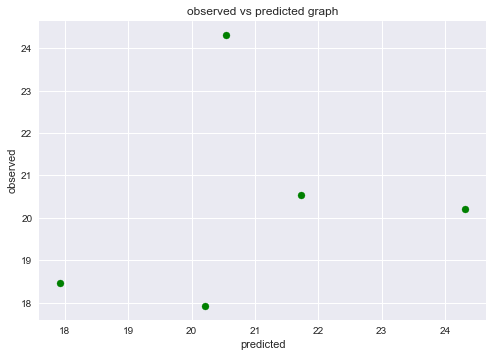

In [51]:
observed = pred.head(5)
predicted= new_pred
plt.scatter(predicted, observed, color='g')
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('observed vs predicted graph')
plt.show()